In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

In [2]:
txt = "Android is a mobile operating system developed by Google."\
    "Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013."\
    "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose."\
    "Twitter is an online news and social networking service on which users post and interact with messages known as tweets."\
    "Before entering politics, Donald Trump was a domineering businessman and a television personality."\
    "The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years."\
    "This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe."\
    "Show me the cheapest round trips from Dallas to Atlanta."\
    "I would like to see flights from Denver to Philadelphia."\
    "Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco."\
    "NASA invited social media users to experience the launch of ICESAT-2 Satellite."\
    "Sukanya, Rajib and Naba are my good friends. " \
    "Sukanya is getting married next year. " \
    "Marriage is a big step in one’s life." \
    "It is both exciting and frightening. " \
    "But friendship is a sacred bond between people." \
    "It is a special kind of love between us. " \
    "Many of you must have tried searching for a friend "\
    "but never found the right one."


tokenized = sent_tokenize(txt)

In [3]:
for i in tokenized:

    # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)

    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words]

    # Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)

    print(tagged)


[('Android', 'NNP'), ('mobile', 'NN'), ('operating', 'VBG'), ('system', 'NN'), ('developed', 'VBD'), ('Google.Android', 'NNP'), ('best-selling', 'JJ'), ('OS', 'NNP'), ('worldwide', 'NN'), ('smartphones', 'NNS'), ('since', 'IN'), ('2011', 'CD'), ('tablets', 'NNS'), ('since', 'IN'), ('2013.Google', 'CD'), ('Twitter', 'NNP'), ('made', 'VBD'), ('deal', 'NN'), ('2015', 'CD'), ('gave', 'VBD'), ('Google', 'NNP'), ('access', 'NN'), ('Twitter', 'NNP'), ("'s", 'POS'), ('firehose.Twitter', 'NN'), ('online', 'NN'), ('news', 'NN'), ('social', 'JJ'), ('networking', 'NN'), ('service', 'NN'), ('users', 'NNS'), ('post', 'VBP'), ('interact', 'JJ'), ('messages', 'NNS'), ('known', 'VBN'), ('tweets.Before', 'RB'), ('entering', 'VBG'), ('politics', 'NNS'), (',', ','), ('Donald', 'NNP'), ('Trump', 'NNP'), ('domineering', 'VBG'), ('businessman', 'JJ'), ('television', 'NN'), ('personality.The', 'NN'), ('2018', 'CD'), ('FIFA', 'NNP'), ('World', 'NNP'), ('Cup', 'NNP'), ('21st', 'CD'), ('FIFA', 'NNP'), ('World', 

In [4]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
nltk_data[:2]

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')]]

## Splitting into train and test

In [7]:
import random
from sklearn.model_selection import train_test_split

random.seed(1234)
train_set, test_set = train_test_split(nltk_data, test_size=0.05)

print("Training Set Length -", len(train_set))
print("Training Set Length -", len(test_set))
print("-" * 120)
print("Training Data Glimpse -\n")
print(train_set[:10])

Training Set Length - 3718
Training Set Length - 196
------------------------------------------------------------------------------------------------------------------------
Training Data Glimpse -

[[('The', 'DET'), ('Communist', 'NOUN'), ('Party', 'NOUN'), ('chief', 'NOUN'), (',', '.'), ('*-1', 'X'), ('in', 'ADP'), ('Moscow', 'NOUN'), ('for', 'ADP'), ('talks', 'NOUN'), ('with', 'ADP'), ('Soviet', 'ADJ'), ('officials', 'NOUN'), (',', '.'), ('also', 'ADV'), ('said', 'VERB'), ('0', 'X'), ('East', 'NOUN'), ('Germany', 'NOUN'), ('would', 'VERB'), ('follow', 'VERB'), ('Gorbachev', 'NOUN'), ("'s", 'PRT'), ('restructuring', 'NOUN'), ('plans', 'NOUN'), ('.', '.')], [('William', 'NOUN'), ('G.', 'NOUN'), ('Kuhns', 'NOUN'), (',', '.'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('*RNR*-1', 'X'), ('and', 'CONJ'), ('chief', 'ADJ'), ('executive', 'ADJ'), ('officer', 'NOUN'), ('*RNR*-1', 'X'), ('of', 'ADP'), ('General', 'NOUN'), ('Public', 'NOUN'), ('Utilities', 'NOUN'), ('Corp.', 'NOUN'), (',', '.'),

## Getting list of tagged words

In [8]:
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

95688

In [9]:
train_tagged_words[:10]

[('The', 'DET'),
 ('Communist', 'NOUN'),
 ('Party', 'NOUN'),
 ('chief', 'NOUN'),
 (',', '.'),
 ('*-1', 'X'),
 ('in', 'ADP'),
 ('Moscow', 'NOUN'),
 ('for', 'ADP'),
 ('talks', 'NOUN')]

In [10]:
train_data_tokens = [pair[0] for pair in train_tagged_words]
train_data_tokens[:10]

['The',
 'Communist',
 'Party',
 'chief',
 ',',
 '*-1',
 'in',
 'Moscow',
 'for',
 'talks']

## POS tags for the tokens in the train set 

In [11]:
train_data_pos_tags = [pair[1] for pair in train_tagged_words]
train_data_pos_tags[:10]

['DET', 'NOUN', 'NOUN', 'NOUN', '.', 'X', 'ADP', 'NOUN', 'ADP', 'NOUN']

In [12]:
training_vocabulary_set = set(train_data_tokens)

In [13]:
training_pos_tag_set = set(train_data_pos_tags)

In [14]:
print("Length : \nVocabulary: {} \nTags: {}".format(len(training_vocabulary_set), len(training_pos_tag_set)))
print("\nAvailable Tags :\n")
print(training_pos_tag_set)

Length : 
Vocabulary: 12073 
Tags: 12

Available Tags :

{'PRON', 'ADP', 'NOUN', '.', 'VERB', 'PRT', 'NUM', 'X', 'ADV', 'ADJ', 'DET', 'CONJ'}


## Emission and Transition Probabilities

In [16]:
import numpy as np

len_pos_tags = len(training_pos_tag_set)
len_vocab = len(training_vocabulary_set)

word_given_tag = np.zeros((len_pos_tags, len_vocab))

In [17]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [18]:

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [19]:
tags_matrix = np.zeros((len_pos_tags, len_pos_tags), dtype='float32')
for i, t1 in enumerate(list(training_pos_tag_set)):
    for j, t2 in enumerate(list(training_pos_tag_set)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

# Let's have a glimpse into the transition matrix
tags_matrix

array([[8.03059246e-03, 2.29445510e-02, 2.08795413e-01, 4.05353718e-02,
        4.85277236e-01, 1.26195028e-02, 7.64818350e-03, 9.13957953e-02,
        3.44168246e-02, 7.38049746e-02, 9.56022926e-03, 4.97131934e-03],
       [6.96782470e-02, 1.69401243e-02, 3.21010023e-01, 3.88877057e-02,
        8.09716620e-03, 1.38504151e-03, 6.30726591e-02, 3.43064144e-02,
        1.34242484e-02, 1.06754743e-01, 3.25591296e-01, 8.52333265e-04],
       [4.62962966e-03, 1.77056000e-01, 2.64071167e-01, 2.39792943e-01,
        1.47163898e-01, 4.36716229e-02, 9.25925933e-03, 2.91994754e-02,
        1.71332750e-02, 1.20297465e-02, 1.32691748e-02, 4.27238271e-02],
       [6.63067922e-02, 9.11381021e-02, 2.21502468e-01, 9.43769664e-02,
        8.88888910e-02, 2.33918126e-03, 8.01619440e-02, 2.73504276e-02,
        5.29014841e-02, 4.40845713e-02, 1.73099414e-01, 5.77597842e-02],
       [3.56533863e-02, 9.15361941e-02, 1.10137962e-01, 3.47233005e-02,
        1.69431090e-01, 3.18555273e-02, 2.25546435e-02, 2.17

In [21]:
import pandas as pd

# convert the matrix to a data frame for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(training_pos_tag_set), index=list(training_pos_tag_set))

# dataset glimpse
tags_df

,PRON,ADP,NOUN,.,VERB,PRT,NUM,X,ADV,ADJ,DET,CONJ
PRON,0.008031,0.022945,0.208795,0.040535,0.485277,0.012620,0.007648,0.091396,0.034417,0.073805,0.009560,0.004971
ADP,0.069678,0.016940,0.321010,0.038888,0.008097,0.001385,0.063073,0.034306,0.013424,0.106755,0.325591,0.000852
NOUN,0.004630,0.177056,0.264071,0.239793,0.147164,0.043672,0.009259,0.029199,0.017133,0.012030,0.013269,0.042724
.,0.066307,0.091138,0.221502,0.094377,0.088889,0.002339,0.080162,0.027350,0.052901,0.044085,0.173099,0.057760
VERB,0.035653,0.091536,0.110138,0.034723,0.169431,0.031856,0.022555,0.217098,0.081538,0.065571,0.134785,0.005115
PRT,0.018640,0.021256,0.248528,0.041857,0.401243,0.001962,0.057881,0.013407,0.010137,0.082734,0.100065,0.002289
NUM,0.001491,0.035182,0.356887,0.118068,0.016398,0.027132,0.183661,0.206917,0.002982,0.033989,0.002982,0.014311
X,0.055502,0.144817,0.062520,0.161722,0.204944,0.184689,0.002711,0.075598,0.025997,0.017544,0.054386,0.009569
ADV,0.014248,0.119947,0.031809,0.136514,0.342611,0.014579,0.032140,0.022531,0.079523,0.130219,0.068588,0.007290
ADJ,0.000493,0.078908,0.697189,0.064277,0.012165,0.010850,0.021207,0.021700,0.004603,0.066250,0.005096,0.017261


## Exploratory Data Analysis

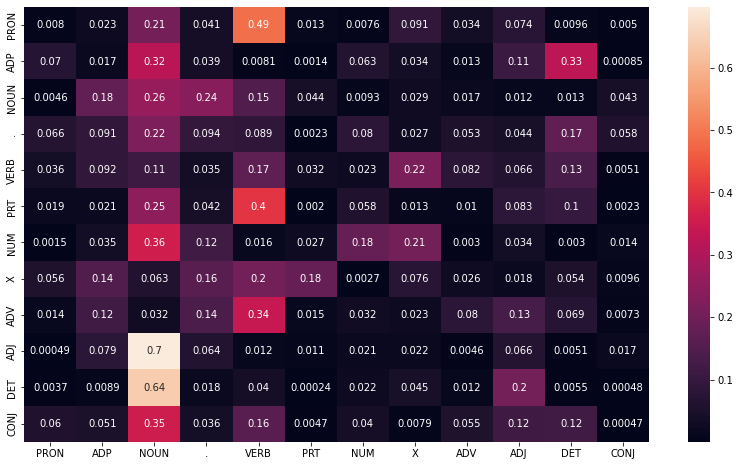

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(tags_df, annot = True)
plt.show()

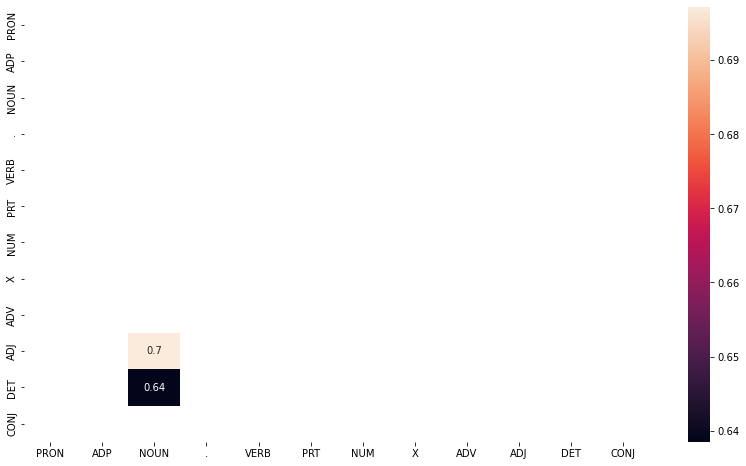

In [23]:
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(14, 8))
sns.heatmap(tags_frequent, annot = True)
plt.show()